In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


In [7]:
# CSVファイルを読み込む
file_path = "../2023-09/curve/"

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z")
)


In [8]:
# 角速度から角度を計算
sampling_rate = \
    df_gyro.shape[0] / (df_gyro["time"].max() - df_gyro["time"].min())
df_gyro['rotate_x'] = np.cumsum(df_gyro['x']) / sampling_rate
df_gyro['rotate_y'] = np.cumsum(df_gyro['y']) / sampling_rate
df_gyro['rotate_z'] = np.cumsum(df_gyro['z']) / sampling_rate


In [9]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    plt.legend()

    plt.show()


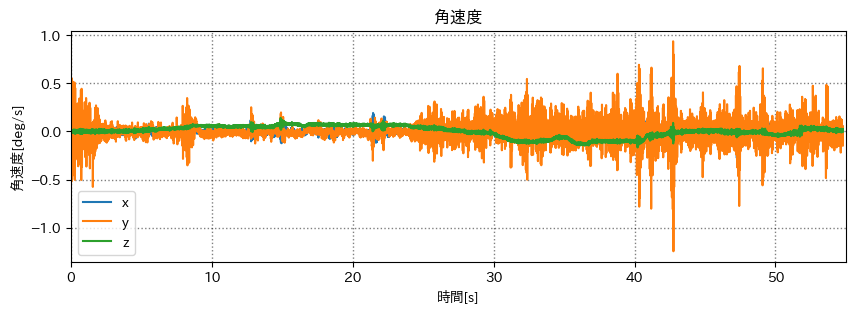

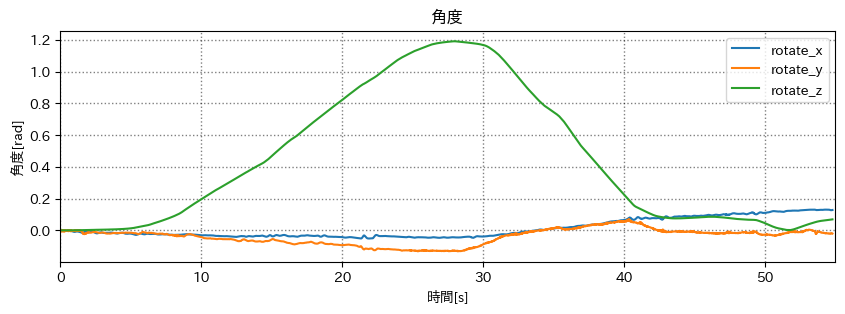

In [10]:
xlim = (0, 55)

# 角速度
plot(
    df_gyro,
    [("time", "x"), ("time", "y"), ("time", "z")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    grid=True
)

# 角度
plot(
    df_gyro,
    [("time", "rotate_x"), ("time", "rotate_y"), ("time", "rotate_z")],
    title="角度",
    xlabel="時間[s]",
    ylabel="角度[rad]",
    figsize=(10, 3),
    xlim = xlim,
    grid=True
)
